In [6]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import scipy
import mplcyberpunk

In [8]:
cd Desktop/MRs/

/home/abhishekkulkarni/Desktop/MRs


In [10]:
data = pd.read_csv("DrisFRZPP15__PGSR_MR.txt" , sep = " ")

M = data.iloc[:,0].values
R = data.iloc[:,1].values

from scipy.stats import gaussian_kde

data = np.vstack((M,R))
kernel = gaussian_kde(data)

m = np.repeat(1.6,1000)
r = np.linspace(8,15,1000)

x = np.vstack((m,r))

kde = kernel.pdf(x)

#plotting
# plot.plot(r,kde)
# mplcyberpunk.add_glow_effects()
# plot.xlabel('$R_{1.6}$ (km)')
# plot.ylabel('p(R)')

In [11]:
#Samples
np.random.seed(1)

#amples = np.random.choice(x, size=1000, p=fit_pdf/np.sum(fit_pdf))
samples_1= np.random.choice(r,size = 1000, p = kde/np.sum(kde))
samples1 = np.sort(samples_1)

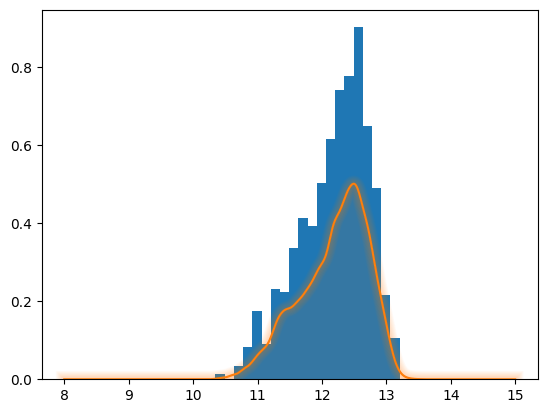

In [12]:
plot.hist(samples1 , density= True , bins = 20)
plot.plot(r,kde)
mplcyberpunk.add_glow_effects()

Text(0, 0.5, 'p(R)')

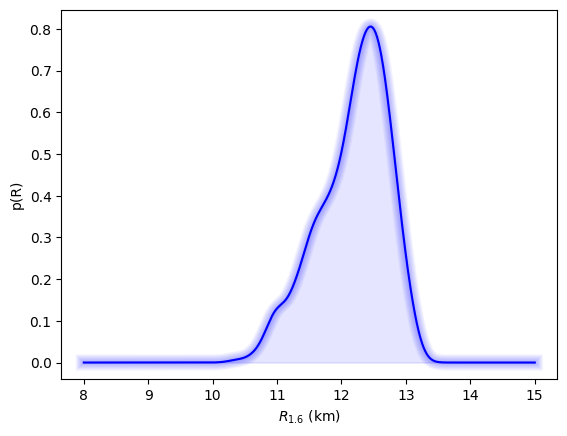

In [15]:
#Samples from method 2 
kernel1 = gaussian_kde(samples1)
kde1 = kernel1.pdf(r)
plot.plot(r,kde1 ,color = "blue")
mplcyberpunk.add_glow_effects()
plot.xlabel('$R_{1.6}$ (km)')
plot.ylabel('p(R)')

In [16]:
#Method 2 - sampling using tolerance method

samples2 = kernel.resample(seed = 2)

Mmin = 1.59
Mmax = 1.61

M_samp = samples2[0]
R_samp = samples2[1]

M1 = []
R1 = []
#tolerance = 10**-12
#m1 = np.repeat(1.6,5550)
r1 = np.linspace(8,15,1000)

for i in range(len(M_samp)):
    if 1.55 < M_samp[i] < 1.65:
        M1.append(M_samp[i])
        R1.append(R_samp[i])
    
M1_sorted = np.sort(M1)
R1_sorted = np.sort(R1)
    
kernel2 = gaussian_kde(R1)
kde2 = kernel2.pdf(r1)

Text(0, 0.5, 'p(R)')

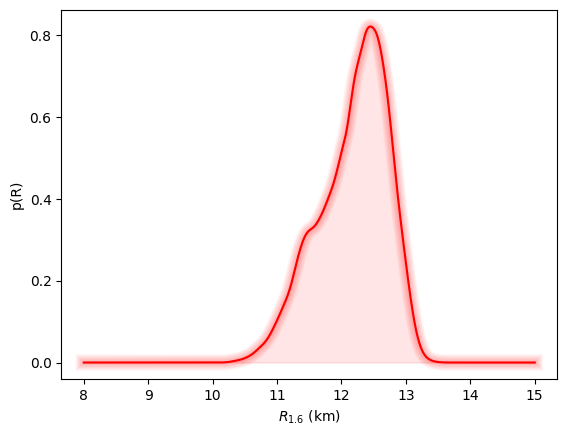

In [17]:
#Plotting
plot.plot(r1,kde2, color = "red")
mplcyberpunk.add_glow_effects()
plot.xlabel('$R_{1.6}$ (km)')
plot.ylabel('p(R)')

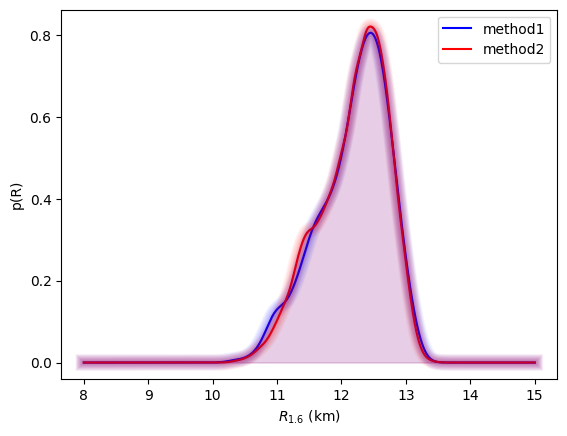

In [22]:
#Plotting method1 

plot.plot(r,kde1 ,color = "blue" , label = "method1")
#mplcyberpunk.add_glow_effects()
plot.xlabel('$R_{1.6}$ (km)')
plot.ylabel('p(R)')

#Plotting method2
plot.plot(r1,kde2, label ="method2" , color = "red")
plot.xlabel('$R_{1.6}$ (km)')
plot.ylabel('p(R)')
plot.legend()
mplcyberpunk.add_glow_effects()
plot.show()